# ÖDEV

# CHAID algoritmasını kullanarak veri seti üzerinde karar ağacı uygulaması

In [ ]:
#1.veri ön işleme

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# 2. Hiperparametre Ayarlama

dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5, random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk: {accuracy:.2f}")

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

print("Karmaşıklık Matrisi:")
print(confusion_matrix(y_test, y_pred))

Doğruluk: 0.97
Sınıflandırma Raporu:
              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        63
      benign       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Karmaşıklık Matrisi:
[[ 59   4]
 [  1 107]]


In [7]:
#3.Özellik önem dereceleri

feature_importances = dt_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Özellik Önem Dereceleri:")
print(feature_importance_df)

Özellik Önem Dereceleri:
                    Feature  Importance
7       mean concave points    0.679677
22          worst perimeter    0.113976
21            worst texture    0.086863
20             worst radius    0.069979
13               area error    0.026591
1              mean texture    0.022914
0               mean radius    0.000000
17     concave points error    0.000000
28           worst symmetry    0.000000
27     worst concave points    0.000000
26          worst concavity    0.000000
25        worst compactness    0.000000
24         worst smoothness    0.000000
23               worst area    0.000000
19  fractal dimension error    0.000000
18           symmetry error    0.000000
15        compactness error    0.000000
16          concavity error    0.000000
14         smoothness error    0.000000
12          perimeter error    0.000000
11            texture error    0.000000
10             radius error    0.000000
9    mean fractal dimension    0.000000
8             m

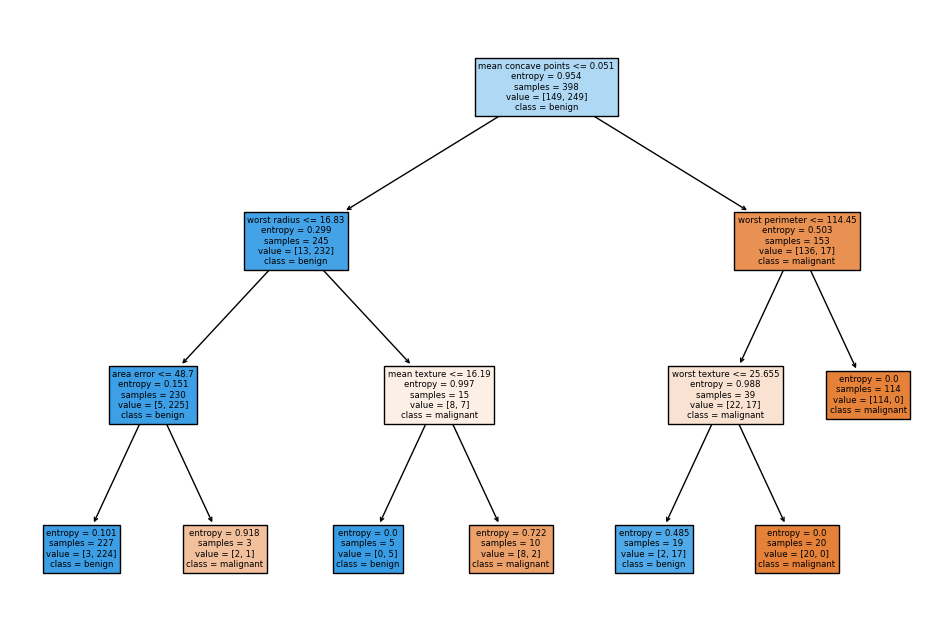

In [8]:
# 4.Karar ağacını görselleştirme

plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

In [ ]:
# ID3:

- Entropy ve bilgi kazancına dayalıdır.

- Sadece kategorik verilerle çalışır.

- Aşırı uyuma eğilimlidir.


# C4.5:

- Bilgi kazancı oranına dayalıdır.

- Sürekli ve kategorik verilerle çalışır.

- Kesikli ağaçlar kullanarak aşırı uyumu önler.


# C5.0:

- C4.5'in hızlı ve verimli versiyonudur.

- Daha yüksek doğruluk sağlar.

- Kesikli ağaçlar kullanarak aşırı uyumu önler.


# CHAID:

- Chi-Kare testine dayalıdır.

- Çoklu bölünme yapabilir.

- Kategorik verilerle çalışmak için uygundur.